<a href="https://colab.research.google.com/github/Motihari09052005/DileeppersonalResume.github.io/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree classifier

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
X=iris.data
y=iris.target
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [3]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
X_train.shape

(120, 4)

In [8]:
y_train.shape

(30, 4)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
# Note: train_test_split returns X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred=clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

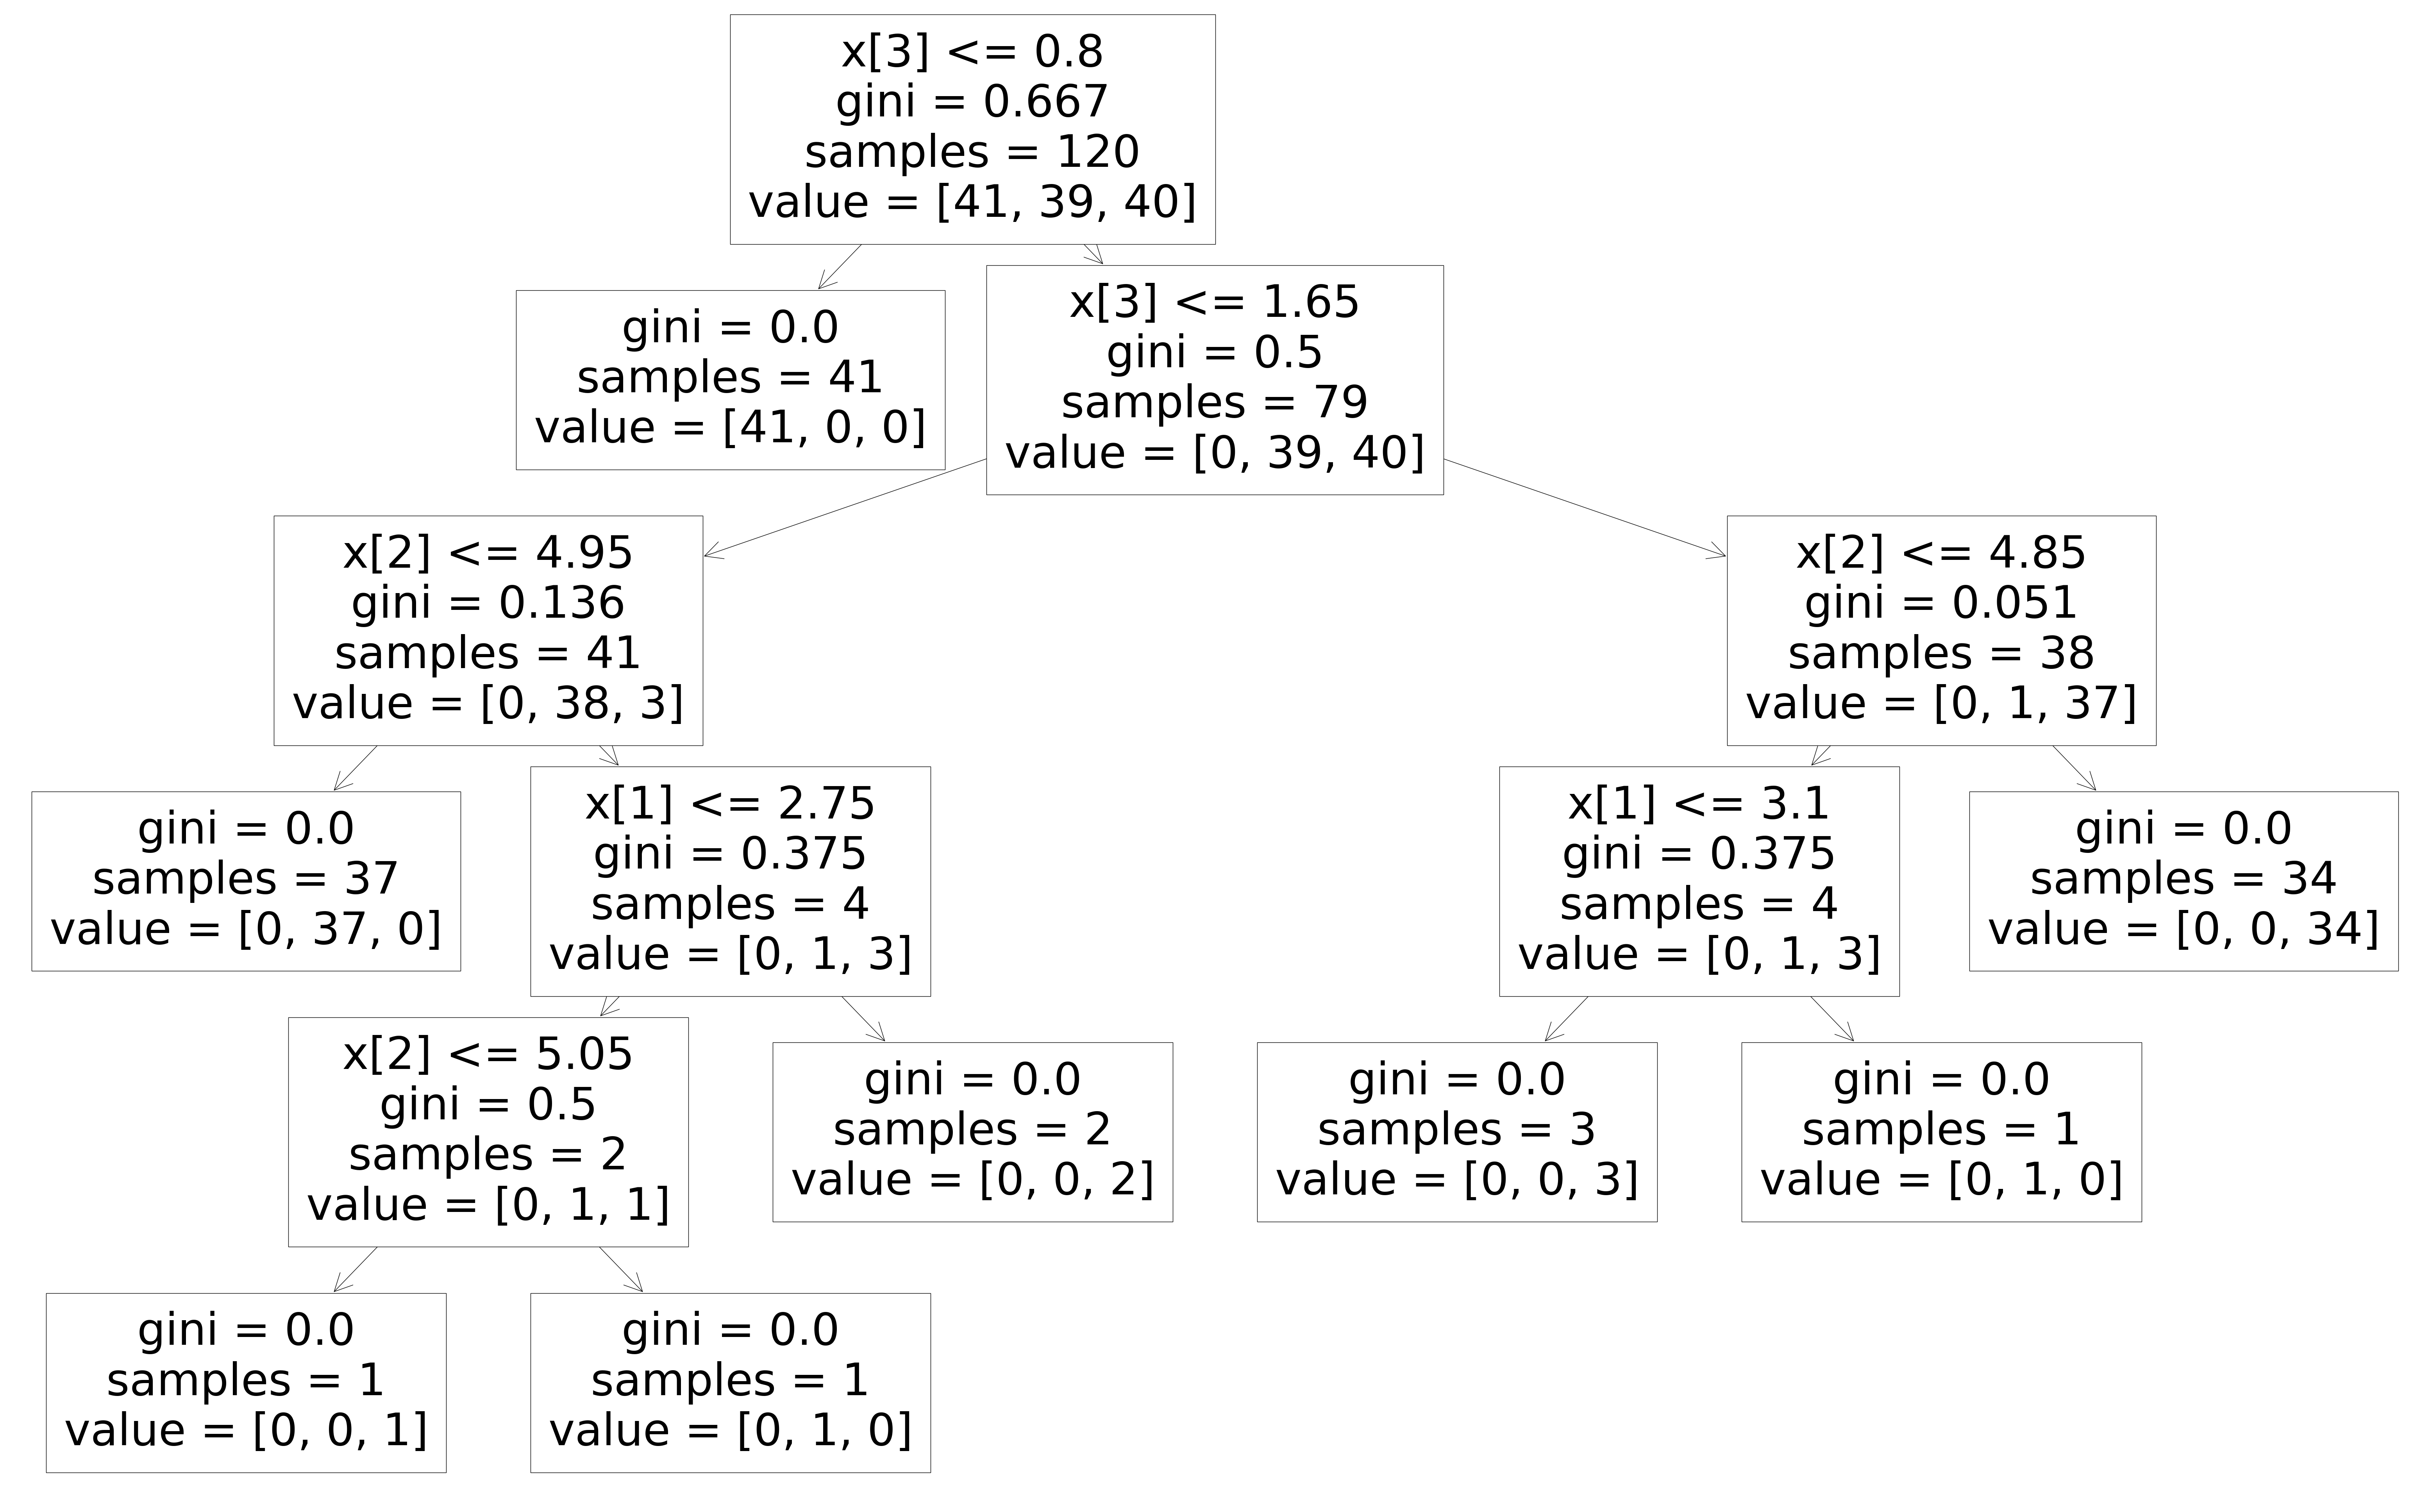

In [36]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(clf)

In [37]:
import numpy as np
import pandas as pd

In [40]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [43]:
X=data.iloc[:,1:4].values
y=data.iloc[:,-1].values


In [44]:
X.shape

(400, 3)

In [45]:
y.shape

(400,)

In [46]:
clf1=DecisionTreeClassifier()
clf1.fit(X,y)



DecisionTreeClassifier()

[Text(0.44502314814814814, 0.9666666666666667, 'x[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.24189814814814814, 0.9, 'x[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(0.11342592592592593, 0.8333333333333334, 'x[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.09490740740740741, 0.7666666666666667, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.13194444444444445, 0.7666666666666667, 'x[2] <= 83500.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.11342592592592593, 0.7, 'x[2] <= 67500.0\ngini = 0.165\nsamples = 77\nvalue = [70, 7]'),
 Text(0.09490740740740741, 0.6333333333333333, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.13194444444444445, 0.6333333333333333, 'x[2] <= 70500.0\ngini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(0.08333333333333333, 0.5666666666666667, 'x[1] <= 39.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06481481481481481, 0.5, 'gini = 0.0\nsamples = 1\nvalu

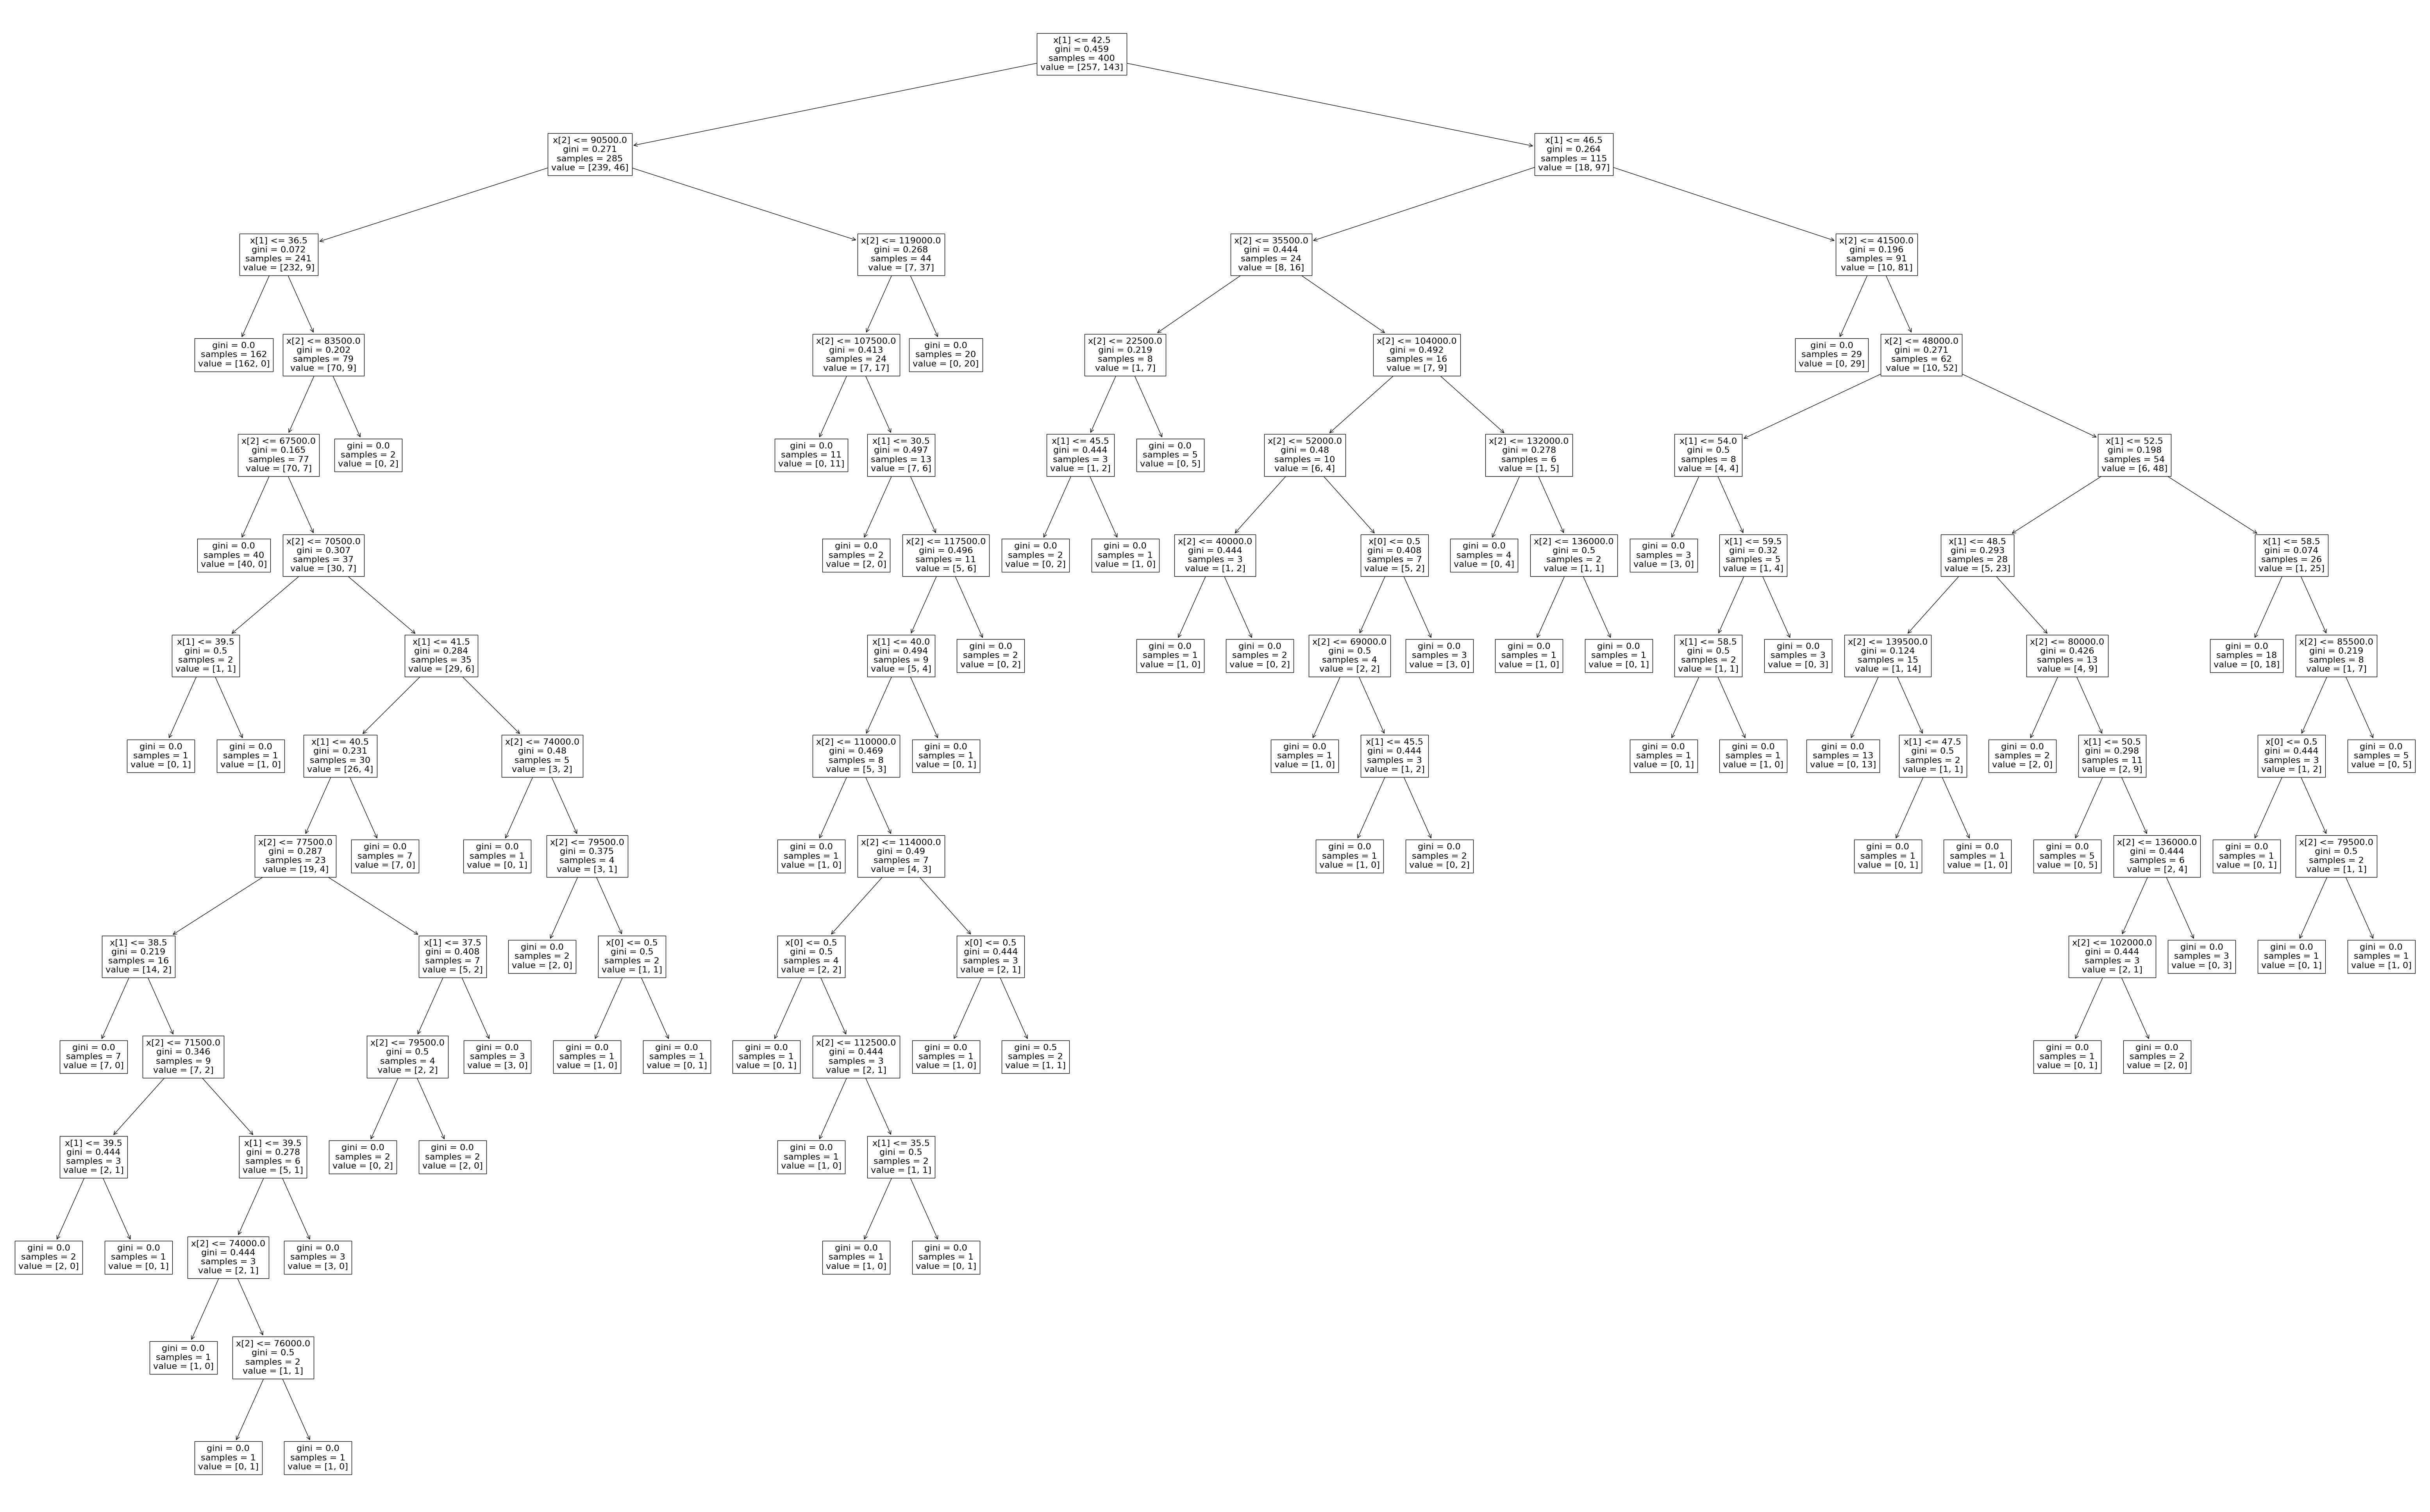

In [47]:
rcParams['figure.figsize']=80,50
plot_tree(clf1)

In [49]:
# There is a overfitting in a graph(upper graph)

In [51]:
clf1=DecisionTreeClassifier()
clf1.fit(X,y)

DecisionTreeClassifier()

In [62]:
clf1=DecisionTreeClassifier(max_depth=3)
clf1.fit(X,y)


DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'x[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(0.125, 0.375, 'x[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.375, 0.375, 'x[2] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.625, 'x[1] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.375, 'x[2] <= 35500.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.875, 0.375, 'x[2] <= 41500.0\ngini = 0.196\nsamples = 91\nvalue = [10, 81]

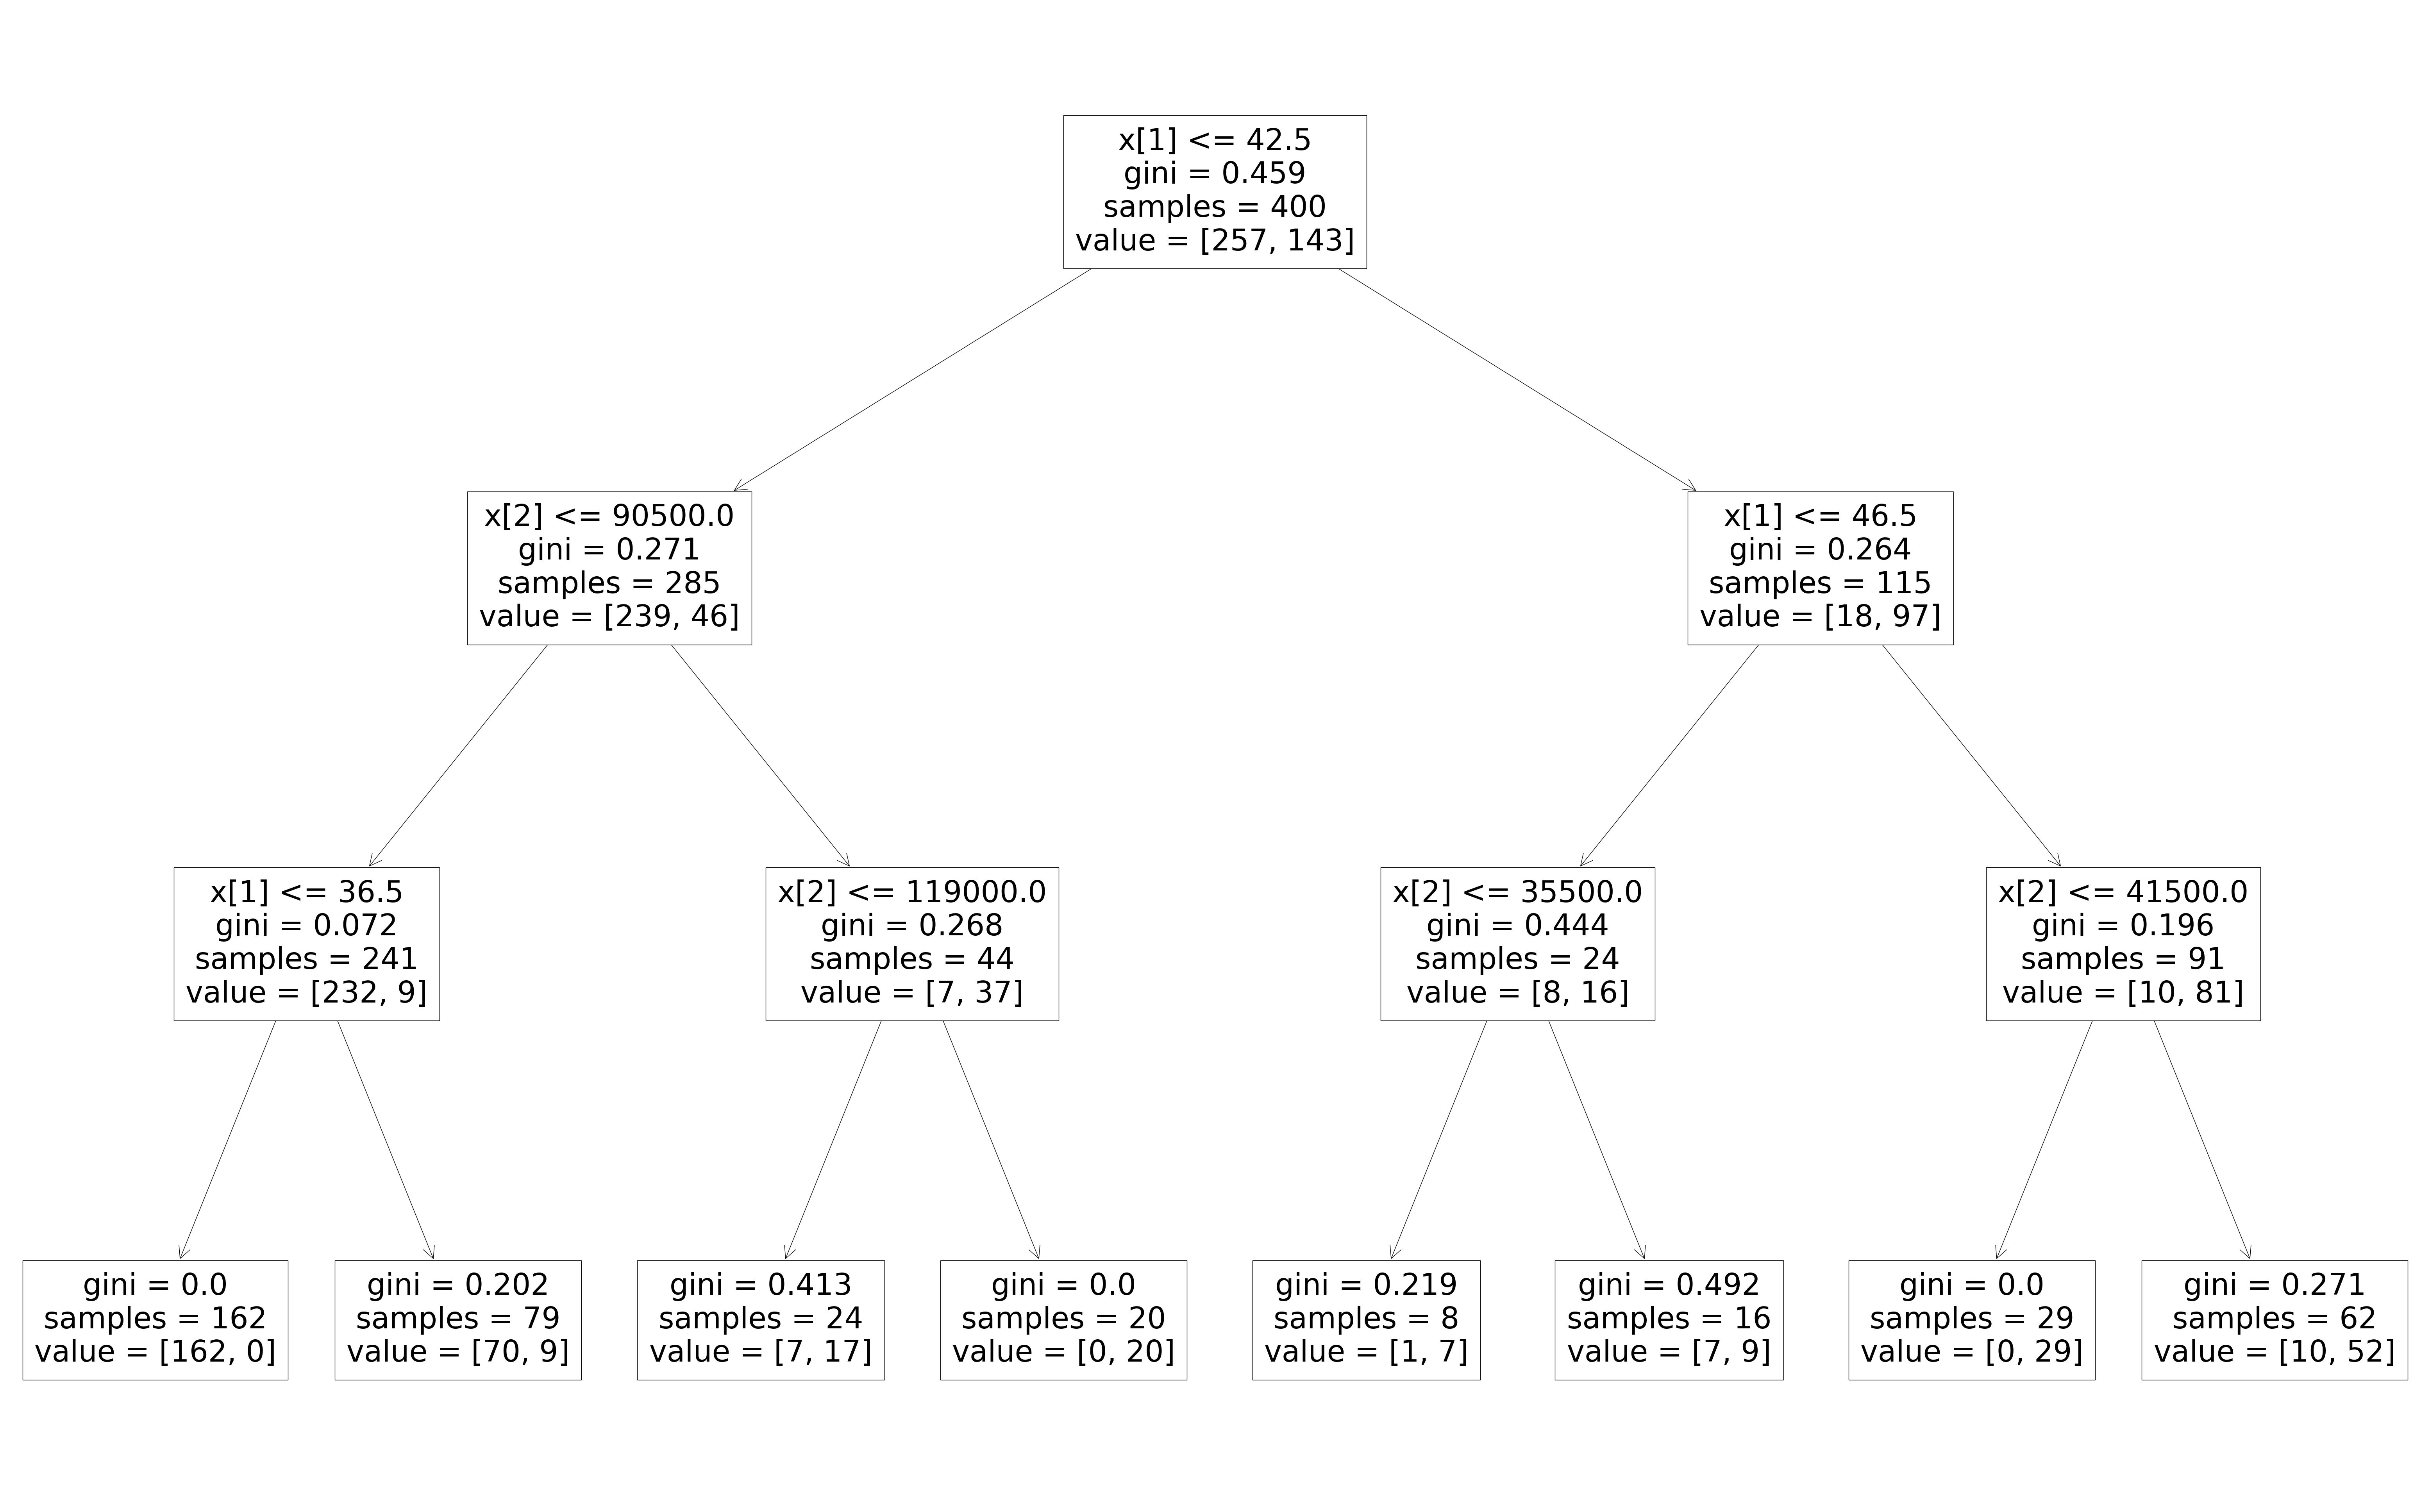

In [63]:
rcParams['figure.figsize']=80,50
plot_tree(clf1)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [78]:
def analyzer(max_depth):
  data=pd.read_CSV("/content/Social_Network_Ads.csv")
  X=data.iloc[:,2:4].values
  y=data.iloc[:,-1].values
  clf=DecisionTreeClassifier(max_depth=max_depth)
  clf.fit(X,y)
  a=np.arange(satrt=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.1)
  b=np.arange(satrt=X[:,1].min()-1, stop=X[:,1].max()+1, step=100)

  XX,yy=np.meshgrid(a,b)
  input_array=np.array([XX.ravel(),yy.ravel()]).T
  labels=clf.predict(input_array)
  plt.contourf(XX,yy,labels.reshape(XX.shape), alpha=0.5)
  plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
  plt.show()


AttributeError: module 'pandas' has no attribute 'read_CSV'